# FYS-STK4155 – Project 1: Regression analysis and resampling methods

##### Authors: Adele Zaini, Gaute Arnesson Holen, Fridtjof Gjengset
##### Date: 11. October, 2021

## Before we start: 

After a general introduction and some theoretical background with elements shared and useful for each exercise, we move more deeply into the explanation and presentation of each task.

### General introduction

In this first project we were asked to explore the techniques of Regression, as the basic step to go further deeply into Machine Learning, and the resampling methods, such as Bootstrap and Cross-validation, while perfoming a Bias-variance decomposition analysis.

In order to set up all our regression and resampling methods, we started working with a vanilla dataset given by the Franke function, depending of two independent variables $x$ and $y$, with an added stochastic noise. At the end, we performed the code with a real dataset taken from a terrain survey.

**Franke's function** is a weighted sum of four exponentials:

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function is defined for $x,y\in [0,1]$.

<right><img src="img/FrankeFunction.png" width="650"></right>

As concerning the noise, we generate datasets with different amounts of noise by changing the $\sigma$ value of its normal distribution $\epsilon \sim \cal{N}(0,\sigma^2)$. By comparing the plot of the Franke function with and without noise and looking at further results, $\sigma=[0.1,0.2]$ gives a reasonable amount of noise.

### Theoretical background

*Note: the explanation is given assuming a two-dimensional problem, in order to emphathise the physical idea and not to overwhelm the explanation of indexes little useful for the understanding. Just consider inputs $x$ as both indipendent variables $(x,y)$ and the outputs $y$ as the third dimension $z$. Relevant differences will be pointed out through notes.*

Given the two datasets of inputs $x=[x_0,x_1,...x_{n-1}]$ and the outputs $y=[y_0,y_1,...y_{n-1}]$, we perform a polynomial fit of this function using Regression methods with the following **basic assumption**. There exists a continuous function (some degree-order polynomial) $f(x)$ s.t. we can interpret the outputs as **$y(x)=f(x)+\epsilon$**. Basically we are splitting the outputs into a deterministic component, our model, and a stochastic error contribution $\epsilon$. Also, an importnant assumption is given by this error $\epsilon$ that we assume normally distributed with $\mu=0$ and variance $\sigma^2$ ($\epsilon \sim \cal{N}(0,\sigma^2)$).

So now assuming that the $f(x)$ can be approximated as a polynomial of $k$ degree, we get the following expression:

$$
y=y(x) \ \ \rightarrow \\ y(x_i)=\tilde{y}_i+\epsilon_i=\sum_{j=0}^{k-1} \beta_j x_i^j+\epsilon_i, \\ \forall i=0,...n
$$

So that our model $\boldsymbol{\tilde{y}}$ (i.e. without the stochastic component) can be rewritten in a matricial notation:

$$
\boldsymbol{\tilde{y}}= \boldsymbol{X}\boldsymbol{\beta},
$$
where $X$ is called *Design matrix* with $n$ rows and the number of columns depending on the degree of the polynomial. While $\beta$ is the estimator vector of the coefficients of our regression. 

*Note: in the three-dimensional problem, each row of the design matrix would look like $X_{i*}=[x_i, y_i,
x_i^2, y_i^2, x_iy_i, \dots]$. If the polynomial is of degree $k$ than our model will have $k'=\frac{(k+1)(k+2)}{2}$ ($k>0$) feutures, that means $k'$ columns of the design matrix and elements in $\beta$. The design matrix is then $(n \ \text{x} \ k')$.*

We need to find the optimal $\hat{\beta}$ that is the one that minimizes the cost function $C(X,\beta)$ (i.e. the "difference" between our data and the model we are choosing). In our own case, the $MSE$ is taken as cost function:
$$
C(X,\beta)=MSE(X,\beta)=\\ =\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\\ =\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-X_{i*}\beta\right)^2
$$


The expression of the optimal $\hat{\beta}$ depends on the regression methods choosen. Here we explore the Linear (Ordinary Least Square, OLS), Ridge and Lasso Regression. For further details, see the introduction of the respective exercise.


### Code structure

The code is structured into libraries (e.g. `regression.py`), which gather all the functions needed for solving the various tasks, while the specific task codes are in `task*.py` files.

In the course of this notebook, we inserted runnable cells to run the task codes directly and dynamically from here to show up the results, e.g.:

```
%run ./1project/task1.py
```


After a brief introduction, we will explain the algorithm, show the results and comment on them.

*Note: a further improvement to the code would be structuring as **object-oriented**. We have started converting the code but by the time of the deadline it was not ready to be runnable yet.*

## Exercise 1: Ordinary Least Square (OLS) on the Franke function

### Introduction
In this task we are asked to write our own code to perfom a standard least square regression analysis using polynomials in $x$ and $y$ up to fifth order. 

### <font color=purple>Ordinary Least Square Equation</font>
For the OLS Regression, the formula for the optimal $\hat{\beta}$ is the following (*Ordinary Least Square Equation*):

$$\hat{\beta}_{OLS} = (X^T X)^{-1}X^T z$$

and the predicted outputs are given by the previous formula $\tilde{z}= X\hat{\beta}_{OLS}$.

### <font color=purple>Error analysis</font>
To access the quality of the model, we perfom an error analysis, involving the Mean Square Error ($MSE$) and the $R^2$ score function:

$$
MSE(\hat{z},\hat{\tilde{z}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(z_i-\tilde{z}_i)^2,
$$

$$
R^2(\hat{z}, \tilde{\hat{z}}) = 1 - \frac{\sum_{i=0}^{n - 1} (z_i - \tilde{z}_i)^2}{\sum_{i=0}^{n - 1} (z_i - \bar{z})^2},
$$

where $\tilde{z}_i$ is the predicted value of the $i-th$ sample, $z_i$ is the corresponding true value and $\bar{z}$ is the mean value given by $ \bar{z} =  \frac{1}{n} \sum_{i=0}^{n - 1} z_i$.

### <font color=purple>Confidence interval</font>

The Confidence Interval gives a range of possible values for an unknown parameter, in own task that is the estimators $\beta$. This confidence interval is then associated with a cumulative probability, which indicates the probability that the random event described by the aleatory variable falls within this confidence interval. Graphically speaking, this is equal to the area subtended by the probability distribution curve of the aleatory variable in the interval considered. A confidence level of $95\%$ is commonly used and it is normally referred to as a *two-$\sigma$* confidence level.

<right><img src="img/ConfidenceInterval.png" width="500"></right>

Assuming that our estimators $\beta_i$ follow a normal distribution, we evaluate the confidence interval thanks to the following formula:

$$
CI=\left(\mu_{\beta_j}\pm \frac{z\sigma_{\beta_j}}{\sqrt{n}}\right),
$$

where $\mu_{\beta_j}$ is the unbiased value of $\beta_j$, $n$ is the number of datapoints, $z$ defines the level of certainty (taken a $z=1.96$ it corresponds to a confidence of $95\%$), while $\boldsymbol{\sigma_{\beta_j}}^2=var(\boldsymbol{\beta_j})$ is the variance of $\beta_j$ evaluated throught the espression:

$$\boldsymbol{\sigma_{\beta_j}}^2 = \boldsymbol{\sigma}^2 [(\mathbf{X}^{T} \mathbf{X})^{-1}]_{jj} $$

where $\sigma$ is the standard deviation of the dataset distribution, which in our case corresponds to the standard deviation of the stochastic error ($z_i \sim \mathcal{N}( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta}, \sigma^2)$, further details on the statics in the [lecture notes](https://compphysics.github.io/MachineLearning/doc/pub/week36/html/week36.html)).

*Note: each of the $\beta$-values has its own confidence interval.*



### Algorithm

First of all, we create our vanilla dataset using the FrankeFunction espression, $n=25$ datapoints for $x$ and $y$ (given 625 $z$ datapoints) and an error distributed as $\epsilon \sim \cal{N}(0,0.1)$. Then we create the design matrix $X$ for a polynomial of degree 5 and we split the data into a 80% training and 20% test datasets. This datasets are then rescaled subtracting the mean value and we perfom a Ordinary Least Square regression to have the model outputs ($z$ values from the training data) and the prediction ones ($z$ values from the test data). The matrix pseudoinverse provided by *numpy* is used to evaluate the inverse in the OLS equation, even when this is singular. The error analysis is then applied to both the training and test outputs and the confidence interval of the $\beta$ estimetors is evaluated.

<font color=purple>**rescaling: You should present a critical discussion of why and how you have scaled or not scaled the data**</font>

The library called `regression.py` contains all the functions needed for this exercise, while the main code is in `task1.py`. The functions used to solve this exercise are:

- `FrankeFunction(x,y)`: evaluate the Franke function from the values $x$ and $y$.
- `create_xyz_dataset(n,mu, sigma)`: create the inputs $(x,y)$ and output $z$ datasets with $n^2$ datapoints and use the `FrankeFunction(x,y)` adding a stochastic normally distrbuted noise $\epsilon \sim \cal{N}(\mu,\sigma)$.
- `Plot_frankefunction(x,y,z)`: create a 3d plot suitable for displaying the Franke function.
- `create_X(x,y,n)`: create the design matrix from the the two indipendent variables $x$ and $y$ with a complexity (i.e. degree of polynomial, feutures) $n$.
- `Split_and_Scale(X,z,test_size=0.2, scale=True)`: split the dataset, using *train_test_split* from Scikit-Learn, into a training and test datasets in a fraction given by a *test_size* (default value *0.2*). Scaling the data is optional, according the problem. The default boolean argument is *scale=True* and it uses the *StandardScaler(with_std=False)* from Scikit-Learn to subtract the mean value from the dataset. 
- `OLS_solver(X_train, X_test, z_train, z_test)`: evaluate the OLS equation through matix inversion and return the optimal $\hat{\beta}$ values, our model $\tilde{z}$ ($z$ values from the training data) and our prediction ($z$ values from the test data). 
- `MSE(z_data, z_model)`: calculate the mean square error of a dataset compared to a model or prediction.
- `R2(z_data,z_model)`: calculate the R2 score of a dataset compared to a model or prediction.
- `Confidence_Interval(beta, X, sigma=1)`: evaluate the confidence interval of $\beta$ values through the their variance and the standard deviation of the model (default value is *1*) with a 95% certainty.

### Results

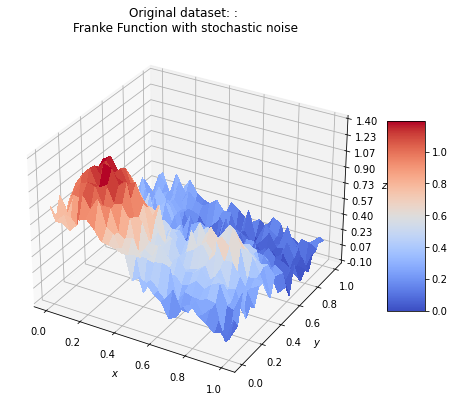

––––––––––––––––––––––––––––––––––––––––––––
Train MSE: 0.0109
Test MSE: 0.0147
––––––––––––––––––––––––––––––––––––––––––––
Train R2: 0.8776
Test R2: 0.845
––––––––––––––––––––––––––––––––––––––––––––
Confidence interval of β-estimator at 95 %:


,$β_{-}$,$β_{ols}$,$β_{+}$
0,0.000,0.000,0.000
1,8.896,8.899,8.902
2,4.102,4.104,4.107
3,-38.883,-38.868,-38.854
4,-19.087,-19.076,-19.064
5,-9.780,-9.767,-9.753
6,56.411,56.442,56.473
7,53.371,53.395,53.419
8,27.579,27.602,27.625
9,-5.459,-5.428,-5.397


––––––––––––––––––––––––––––––––––––––––––––


In [3]:
%run ../1project/task1.py

### Comments

The $MSE$ is very close to 0 and $R^2$ tends to 1 for both training and testing datasets. This shows a very good behaviour of our model, as a fit of a fifth order polynomial.

The confidence interval of $\beta$ shows that for each estimator the range is very small, meaning that the variance is not high and the model is performing well, not going into overfitting.

## Exercise 2: Bias-variance trade-off and resampling techniques

### Introduction

This exercise focuses on studying the bias-variance trade-off by implementing the *bootstrap* resampling technique.

### <font color=purple>MSE VS complexity</font>

First of all we are asked to analyse the MSE both for training and testing data as a function of complexity (i.e. degree of fitting polynomial), in order to identify the best complexity. The question is: *which is the best complexity then?*

Let's consider the following picture, taken from [Hastie et al.](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf):

<right><img src="img/MSE_complexity.png" width="500"></right>

Considering the testing MSE, we expect that it tends to 0, because we are tuning our model on the training dataset and the "difference" between the real data and our model tends to 0 when complexity increases. Considering instead the test MSE, it show a U-behaviour, getting to an increase when reaching a certain value of complexity. This means we are overfitting. Testing the model on new fresh data allows us to check if the model is "over-complex" and tends to pass through every single datapoint without considering and buffering the stochastic noise, as it should be. Here is a picture showing case of **underfitting and overfitting**:

<right><img src="img/Under_Overfitting.png" width="700"></right>

This is exactly the reason why we need to split in training and testing datasets. 

It is also possible to appreciate the regions of low/high bias and variance, it will be clearer after the Bias-Variance tradeoff analysis explanation.

So *which is the best complexity then?* The best complexity corresponds to the **minimum of the test MSE curve**.

### <font color=purple>Bootstrap and resampling techniques</font>

Resampling techniques are used to have more robust outputs from the model analysis. This means that if we want to evaluate the MSE, doing it once may not be sufficient to investigate the real bahaviour of the model. The basic idea is **resampling and reshuffling the dataset, then performing the algorithm on this "new" dataset for $b$ times, having then a probability distribution of the estimator we want to investigate** (in our case this is the optimal $\hat{\beta}$). 

This is a way to "by-pass" the fact that we have a limited dataset to realize our model, while at the same time making everything less sensible to stochastic fluctuations in this realization.

**Bootstrap algorithm**:

Given a domain $D=[x_1,x_2, \dots, x_n]$,
1. Draw a bootstrap sample $[x_1^*,x_2^*, \dots, x_n^*]$ randomly selecting from domain;
2. Compute $\hat{\beta}^*=g(x_1^*,x_2^*, \dots, x_n^*)$ with the proper function $g(x_j)$ (in our case is the OLS equation);
3. Repeat the previous steps b-times, yielding the set of estimators {$\hat{\beta}^*_1,\hat{\beta}^*_2,\dots,\hat{\beta}^*_b$};
4. Now it is possible to draw the histogram and can apply all the statistics we need to investigate the statistical properties of out estimator $\hat{\beta}$. 

Here is an example of the bootstrap resampling tecnique as demonstration of the *central limit theorem* ($z\rightarrow\mu$ and $\sigma_z\rightarrow\sigma/\sqrt{b}$ as datapoints $N\rightarrow\infty$).

<right><img src="img/Bootstrap.png" width="500"></right>

### <font color=purple>Bias-Variance Tradeoff Analysis</font>

The bias–variance tradeoff is a way of analyzing a learning algorithm's expected error (e.g. $MSE$) as a sum of three terms: the bias, variance, and a quantity called the *irreducible error*, which is usually the variance $\sigma^2$ of the noise $\epsilon$ distribution.

$$
MSE=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=bias^2+variance+\sigma^2.
$$

where:

$$
bias^2=\mathrm{Bias}^2(\boldsymbol{f},\boldsymbol{\tilde{y}})=\mathbb{E}\left[(\boldsymbol{f}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2 \\
variance=\mathrm{Var}\left[\boldsymbol{\tilde{y}}\right]=\mathbb{E}\left[(\boldsymbol{\tilde{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2 \\
\sigma^2=\mathbb{E}\left[(\boldsymbol{\epsilon}-\mathbb{E}\left[\boldsymbol{\epsilon}\right])^2\right]=\mathbb{E}\left[\boldsymbol{\epsilon}^2\right]
$$


<font color=purple>**Prove the equation:**</font>

To derive this equation, we need to recall that the variance of $\boldsymbol{y}$ and $\boldsymbol{\epsilon}$ are both equal to $\sigma^2$ and the mean value of $\boldsymbol{\epsilon}$ is by equal to zero. Furthermore, the function $f$ and $\boldsymbol{\tilde{y}}$ are not stochastic variables.

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}})^2\right],
$$

and adding and subtracting $\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]$ we get

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}}+\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right],
$$

Reorganizing the espression we get
$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=
\mathbb{E}\left[(\boldsymbol{f} -\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]+
\mathbb{E}\left[(-(\boldsymbol{\tilde{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]))^2\right]+
\mathbb{E}\left[(\boldsymbol{\epsilon})^2\right],
$$

And so the three terms of the previous expression.

<font color=purple>**Meaning of the bias and variance terms:**</font>
- **Bias**: is the error we get when assuming a model. It is the "distance" between the real function $f$ and the model $\tilde{y}$ and highlights the erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (*underfitting*).
- **Variance**: shows how much the model outputs are spread. High variance may result from an algorithm modeling the stochastic noise in the training data (*overfitting*).

<center><img src="img/Bias_Variance.png" width="900"></center>

Our aim is then get a low bias and a low variance, that corresponds indeed with the minimum of the error (i.e. $MSE_{test}$). In the right graph, we can appreciate the dependance to complexity and the areas of the underfitting and overfitting with bias and variance decomposed. In this case the best complexity is in the range $[8,10]$.

### Algorithm

Firstly, the $MSE$ is explored as function of complexity in order to get figure. 2.11 from [Hastie et al.](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf). This means running the previous code in an external loop over a range of degrees of the polynomial. This is done through the following function:

- `plot_ols_complexity(x, y, z, complexity = np.arange(1,21))`: compute the $MSE_{train}$ and $MSE_{test}$ of the OLS Regression as functions of complexity and plot the graph.

As concerning the second part, the Bias-Variance tradeoff analysis has been implemented with the *bootstrap* algorithm through the following functions:

- `bootstrap(X_train, X_test, z_train, z_test, n_boostraps=100)`: run the bootstrap algorithm over *n_bootstrap* times and return a matrix where the columns correspond to the $z$ predictions from each bootstrap run (dimension: [*n X n_bootstrap*])
- `bias_variance_analysis(X_train, X_test, z_train, z_test, resampling="bootstrap", n_resampling = 100)`: operate the bias-variance tradeoff analysis coupled with the given *resampling* method (default: bootstrap) with *n_resampling* runs and return the *error* (i.e. $MSE_{test}$), the *bias* and the *variance*.
- `bias_variance_complexity(x, y, z, complexity = np.arange(1,15), n_resampling = 100, test_size = 0.2, plot=True, title)`): compute the *error*, the *bias* and the *variance* as functions of complexity, plot the graph (optional) and retunr the vectors of the three variables versus complexity, for further analysis. Other paramenters (i.e. *n_resampling*, *test_size*) are given to tune the analysis and explore its behaviour.

After performing the bias-varaince tradeoff analysis in a range of complexity $(0,18)$, we run a loop for exploring different properties of this analysis, changing the number of datapoints ($n^2=[625,1600]$) and the portion of training and testing datapoints ($\text{test_size}=[0.2,0.33]$).

Seeing that the results are not smooth as expected, a rolling mean has been performed to buffer the fluctuation and to get the increasing or decreasing trend. A function has been written:

- `Rolling_Mean(vector, windows=3)`): use Pandas' dataframe to evaluate the rolling mean of the given vector over a given number of windows (default: 3), the "upper value" from the mean at $+\sigma$ and the "bottom value" from the mean at $-\sigma$.

This function is then called to plot nice smooth graphs.

### Results

Part 1: MSE_train and MSE_test in function of the complexity of the model (degree-order of polynomial) 



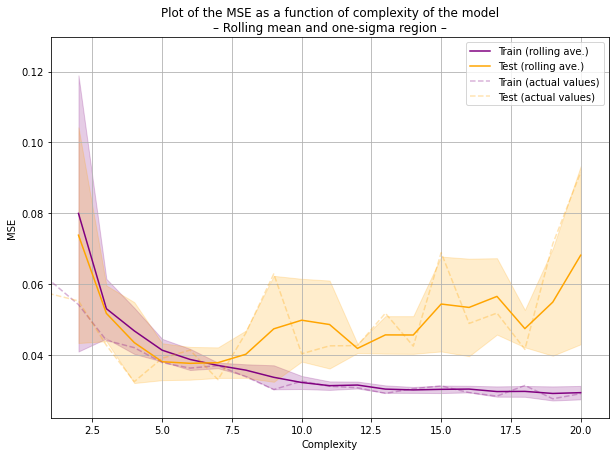

Part 2: perform a bias-variance tradeoff analysis 

Train datapoints: 500
Test datapoints: 125


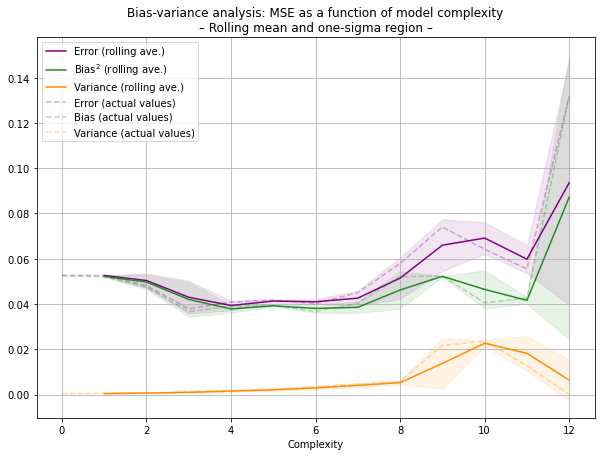

Bias-variance tradeoff analysis with variation in training and testing datapoints
0 ) Datapoints: 625 – Test size: 0.2
1 ) Datapoints: 625 – Test size: 0.33
2 ) Datapoints: 1600 – Test size: 0.2
3 ) Datapoints: 1600 – Test size: 0.33


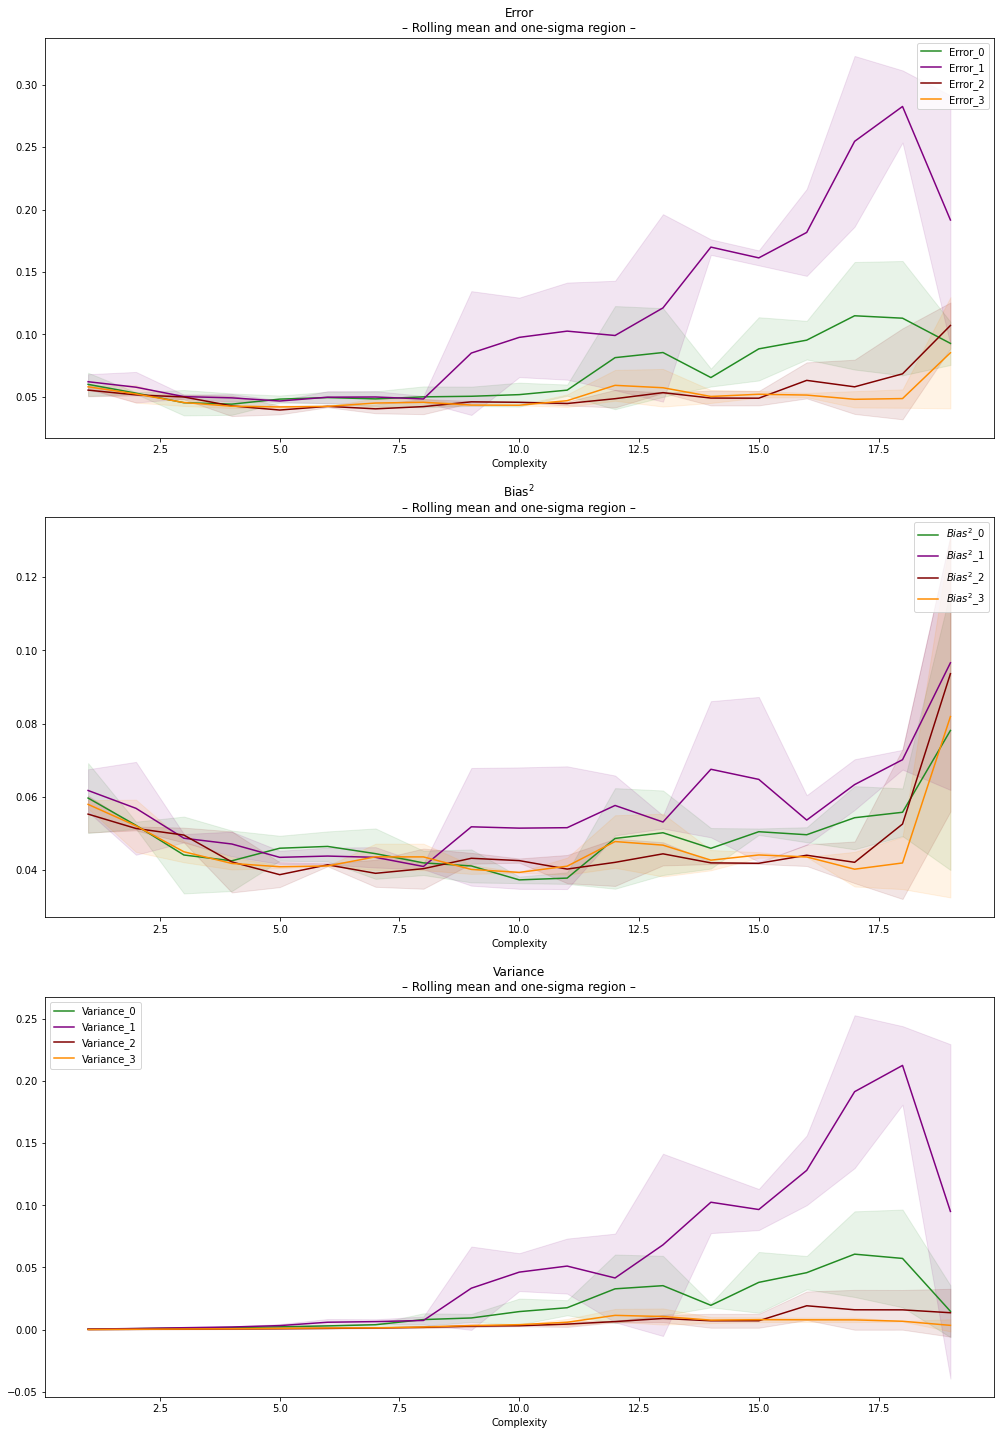

In [4]:
%run ../1project/task2.py

### Comments

<font color=purple>**MSE VS complexity**</font>

Initially the MSE for both test and train decreases as our model improves with the complexity of the polynomial. Around a polynomial of the 5th degree, we can see that the MSE for the test data increases, while the MSE for the train data continues to decrease. This is because the increased complexity causes overfitting. Our model therefore fits the training data better, but gives a poor model for the test data, because it has overfitted to the training set. It seems our model does best around a complexity of $n=5$.


<font color=purple>**Bias-variance tradeoff analysis**</font>

[...]

–––––––––––––––––––––––––––––––––––––

**Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points**, and possibly also your training and test data using the **bootstrap** resampling method.</font>

## Summing up




The bias-variance tradeoff summarizes the **fundamental tension** in
machine learning, particularly supervised learning, **between the
complexity of a model and the amount of training data** needed to train
it.  Since data is often limited, in practice it is often useful to
use a less-complex model with higher bias, that is  a model whose asymptotic
performance is worse than another model because it is easier to
train and less sensitive to sampling noise arising from having a
finite-sized training dataset (smaller variance). 



The above equations tell us that in
order to minimize the expected test error, **we need to select a
statistical learning method that simultaneously achieves low variance
and low bias**. Note that variance is inherently a nonnegative quantity,
and squared bias is also nonnegative. Hence, we see that the expected
test MSE can never lie below $Var(\epsilon)$, the irreducible error.


What do we mean by the variance and bias of a statistical learning
method? 
– The variance refers to the amount by which our model would change if we
estimated it using a different training data set. Since the training
data are used to fit the statistical learning method, different
training data sets  will result in a different estimate. But **ideally the
estimate for our model should not vary too much between training
sets. However, if a method has high variance  then small changes in
the training data can result in large change** in the model. In general, more
flexible statistical methods have higher variance.


## Exercise 3: Cross-validation as resampling techniques, adding more complexity

### Introduction


### Algorithm

Gaute
- `FrankeFunction(x,y)`:


### Results

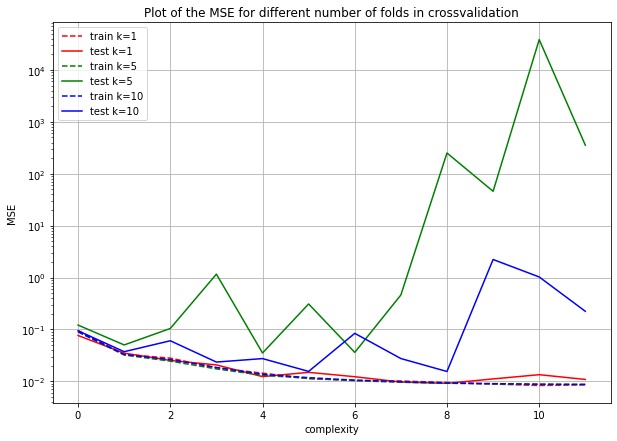

In [5]:
%run ../1project/task3.py

### Comments
<font color=purple>**comment results**</font>

## Exercise 4: Ridge Regression on the Franke function with resampling

### Introduction

We are then asked to rerun all the previous results switching from the OLS Regression to the Ridge Regression.

For the Ridge Regression, the formula for the optimal $\hat{\beta}$ is the following:

$$
\hat{\beta}_{\mathrm{Ridge}} = \left(X^TX+\lambda I\right)^{-1}X^Tz,
$$

and the predicted outputs are given by the previous formula $\tilde{z}= X\hat{\beta}_{Ridge}$.


<font color="purple">
We see that Ridge regression is nothing but the standard OLS with a
modified diagonal term added to $\boldsymbol{X}^T\boldsymbol{X}$. The consequences, in
particular for our discussion of the bias-variance tradeoff are rather
interesting. We will see that for specific values of $\lambda$, we may
even reduce the variance of the optimal parameters $\boldsymbol{\beta}$. These topics and other related ones, will be discussed after the more linear algebra oriented analysis here. </font>

### Algorithm
- `Ridge_solver(X_train, X_test, z_train, z_test)`:

### Results

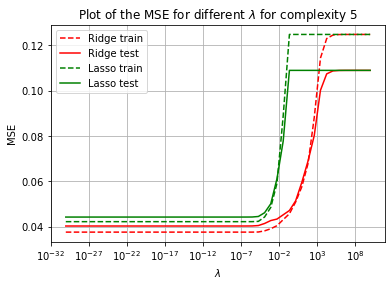

In [2]:
import warnings
warnings.filterwarnings('ignore')
%run ../1project/task4.py

### Comments
<font color=purple>**comment results**
Study the dependence on $\lambda$</font>

## Exercise 5: Lasso Regression on the Franke function  with resampling

### Introduction
For the Lasso Regression, there is no nice formula as for $\hat{\beta}_{OLS}$ and $\hat{\beta}_{Ridge}$, because the cost function has an absolute value that raises problem when we derivate to find the optimal $\hat{\beta}_{Lasso}$:

$$
\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\hat{\beta}_{Lasso}}+\lambda \mathrm{sgn}(\boldsymbol{\hat{\beta}}_{Lasso})=2\boldsymbol{X}^T\boldsymbol{y}.
$$

where $$
\mathrm{sgn}(\boldsymbol{\beta})=\frac{d \vert \beta\vert}{d \boldsymbol{\beta}}=\left\{\begin{array}{cc} 1 & \beta > 0 \\ 0 & \beta =0\\-1 & \beta < 0, \end{array}\right.
$$

and the predicted outputs are given by the previous formula $\tilde{z}= X\hat{\beta}_{Lasso}$.


### Algorithm
- `Lasso_solver(x,y)`:

### Results

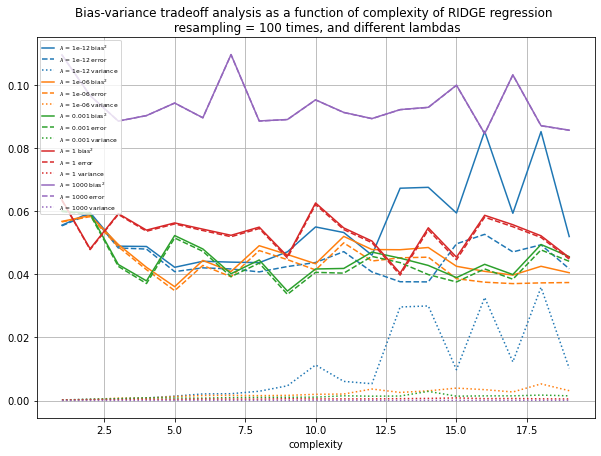

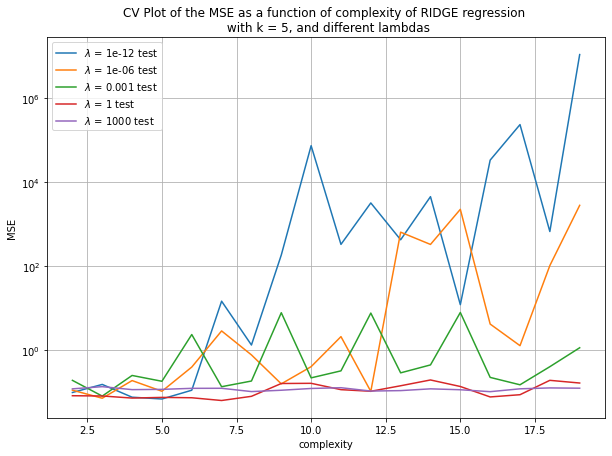

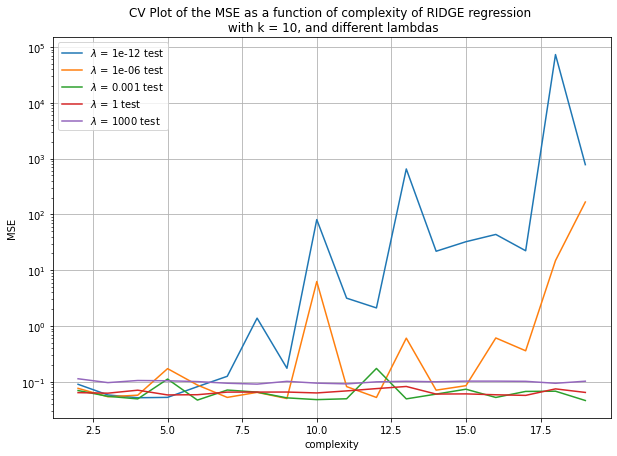

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.87789040553463, tolerance: 0.007986617651066993
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.081829277915297, tolerance: 0.008189263767479287
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.65025080075675, tolerance: 0.008823423274305254
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.29837909770012, tolerance: 0.00829089592415465
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.610634405454125, tolerance: 0.00868762714488456
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.73584950417435, tolerance: 0.008598278398169458
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklear

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.068282029248426, tolerance: 0.0080865453554949
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.22721688953182, tolerance: 0.007674217545037779
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.529017155146127, tolerance: 0.007582632516818282
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.442335531661193, tolerance: 0.008842766092527836
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.75848833982627, tolerance: 0.00790727237429235
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.49266908171818, tolerance: 0.008518933486159364
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.169984771372697, tolerance: 0.008432209773889657
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.158247266629356, tolerance: 0.007918364827533319
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.396702130688519, tolerance: 0.007790754060905353
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.313394401579835, tolerance: 0.009413256418557371
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.430662633231186, tolerance: 0.00907537426099359
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.879165206846702, tolerance: 0.00921926476355138
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.932123182924423, tolerance: 0.008433711125060929
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.47602131008842, tolerance: 0.009235119210637919
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.169742291074105, tolerance: 0.008435052793665876
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.158642083635057, tolerance: 0.008359025822802565
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.253655488703759, tolerance: 0.008453149490760198
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.81763697854223, tolerance: 0.009215112207205037
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.475264794342767, tolerance: 0.00885003884490294
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.342727664650448, tolerance: 0.007668819851211956
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.457257450966148, tolerance: 0.00933599800723549
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.891536172828703, tolerance: 0.009263737379910994
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.618541007701056, tolerance: 0.008499074026715122
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.383462632750762, tolerance: 0.00872625398377768
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.805256757593455, tolerance: 0.008794458101842182
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.51836486962234, tolerance: 0.007930561447686273
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.990602685118374, tolerance: 0.008701526552524576
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.809155346396262, tolerance: 0.008305222035910711
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.321122225868653, tolerance: 0.00857113025760117
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.303125102115233, tolerance: 0.008253373900730705
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.228036519936364, tolerance: 0.008409279305283235
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.862914705113502, tolerance: 0.009249034420534845
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.837759445186109, tolerance: 0.008278913016143388
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.4479108689321, tolerance: 0.008599324555888486
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.226470612462062, tolerance: 0.009484583197108827
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.264273660462347, tolerance: 0.009098484369962943
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.297854559630135, tolerance: 0.008573651035026657
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.324862076158142, tolerance: 0.008620159289662055
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.415878013330598, tolerance: 0.008299366451439878
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.249396508524807, tolerance: 0.009037392434702316
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.938799958796059, tolerance: 0.008575290025367437
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.216776206765015, tolerance: 0.008397238268225301
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.36103976159572, tolerance: 0.007991457799198045
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.178954343078628, tolerance: 0.008858336788554851
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.989594298288837, tolerance: 0.008506654130852652
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.18171285188673, tolerance: 0.008511781733569472
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.36701712083171, tolerance: 0.008151911588594107
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.63919006433748, tolerance: 0.009637780656441011
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.982362306603696, tolerance: 0.009249612134708136
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.258986757725927, tolerance: 0.008402111578054695
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.07973148435984, tolerance: 0.008326448062659652
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.758112135880902, tolerance: 0.008596763910127283
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.927827623284909, tolerance: 0.008835433515584143
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.609883431947154, tolerance: 0.009326192636614534
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.922503573322816, tolerance: 0.008674819451320127
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.558988778269295, tolerance: 0.008542427734077962
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.170520012915734, tolerance: 0.008956235840296055
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.178894074965529, tolerance: 0.008644749837726727
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.343181099741408, tolerance: 0.009399900319873035
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.876867610845645, tolerance: 0.007568198948692484
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.18214220511486, tolerance: 0.008760231183017156
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.24615172817775, tolerance: 0.009102759360913688
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.534154448089602, tolerance: 0.008242492068925232
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.023887561267657, tolerance: 0.008712643089958352
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.283483987465825, tolerance: 0.009052902260217916
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.984197372664607, tolerance: 0.00919353515955003
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.962553200654, tolerance: 0.008519014691033739
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.753622233882735, tolerance: 0.008396389669512313
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.622593286963909, tolerance: 0.008838512825392844
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.464307599844554, tolerance: 0.008711520599281056
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.480398084087678, tolerance: 0.008591862608615228
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.47041533070558, tolerance: 0.009401940476639555
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.00928762415732, tolerance: 0.008846717117991737
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.29668193959402, tolerance: 0.008383878469567672
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.92230118748439, tolerance: 0.008251958977120371
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.734294378798799, tolerance: 0.008746039409445471
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.505044909835819, tolerance: 0.008255663437482332
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.140191151068052, tolerance: 0.00793074067891266
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.333732902530022, tolerance: 0.009880447010721029
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.689002318985514, tolerance: 0.008663578367677876
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.493819026531494, tolerance: 0.00836787137406213
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.150460864361428, tolerance: 0.008504007303023817
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.744618684437588, tolerance: 0.009432237697784885
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.44789208331099, tolerance: 0.00811440659076093
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.800770534328434, tolerance: 0.008924076662183667
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.241150370814838, tolerance: 0.008429589050667275
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.98662639913355, tolerance: 0.008921696820768828
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.3420389603739, tolerance: 0.008281855886847603
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.10731069443457, tolerance: 0.009200393124372859
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.97993348063102, tolerance: 0.007411544222983668
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklear

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.683138144372217, tolerance: 0.00890718949219368
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.161288413724975, tolerance: 0.008261147391924895
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.70953127164636, tolerance: 0.008412948192475282
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.945555427611854, tolerance: 0.007609655925116248
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.038550691828162, tolerance: 0.008591763700411635
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.675024599500894, tolerance: 0.008301463985453885
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.95558924881721, tolerance: 0.008664278664063914
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.551199403915085, tolerance: 0.00735164755038501
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.780433933682696, tolerance: 0.008845855643069658
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.430822863047077, tolerance: 0.00809160910980404
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.735304668268522, tolerance: 0.008190713988425646
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.292161335886494, tolerance: 0.009349193442669974
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.038465661569244, tolerance: 0.009621494817605877
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.139001496119239, tolerance: 0.008852302570951773
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.024889670186298, tolerance: 0.009039458104015267
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.324286244450608, tolerance: 0.009007878866364524
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.66971412970339, tolerance: 0.009351720868635133
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.463348258111008, tolerance: 0.00870934529667132
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.45706999703123, tolerance: 0.008834395093498974
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.165708129142468, tolerance: 0.00953196250418595
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.048651629029546, tolerance: 0.010026687996538624
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.998780176205258, tolerance: 0.008241869538791264
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.942152293122957, tolerance: 0.008164278418447331
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.636522664058239, tolerance: 0.00798179262225773
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.909489112642952, tolerance: 0.008446892298102105
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.93951354410415, tolerance: 0.008403292457596289
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.074050404479841, tolerance: 0.007908407913694264
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.53032640355086, tolerance: 0.008903867745102633
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.183297641996198, tolerance: 0.008994515115542168
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.2667719138736, tolerance: 0.008081883415612176
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.11537856899616, tolerance: 0.008788862390146528
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.904544890143816, tolerance: 0.0081669283458571
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.98297120097981, tolerance: 0.008446677554221477
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklear

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.757967956634506, tolerance: 0.008464471726346205
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.639896845656635, tolerance: 0.008599092503402404
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.140304242937415, tolerance: 0.008652881032780344
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.512424595637425, tolerance: 0.00887206640002055
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.580875412243486, tolerance: 0.008176817018898434
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.98234063385276, tolerance: 0.009178601450365786
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.802657242827397, tolerance: 0.008882284449838187
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.702569030151514, tolerance: 0.008224384445661643
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.205709165828347, tolerance: 0.008510786609631721
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.795229900668726, tolerance: 0.009614119437703234
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.30793766583495, tolerance: 0.00876742999748032
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.925725853334486, tolerance: 0.008031198374807022
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.8211666330554, tolerance: 0.009171050542326257
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.837682072828423, tolerance: 0.008725273408348468
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.994622143493197, tolerance: 0.008394801058725221
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.558075630466442, tolerance: 0.008901782549489395
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.273311763841226, tolerance: 0.008624070755487137
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.886142684801449, tolerance: 0.008183427086899434
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.609030860373164, tolerance: 0.00820664601718786
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.727030055439595, tolerance: 0.008638864871074672
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.938831736096075, tolerance: 0.009364450874570947
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.33863034559821, tolerance: 0.009516499537902729
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.26244500561686, tolerance: 0.008999156006949921
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.935703967711992, tolerance: 0.00765822399581887
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.757578823557608, tolerance: 0.008125118470971781
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.655683534433756, tolerance: 0.008500775571221994
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.616482741534124, tolerance: 0.008196134224426967
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.58169869189843, tolerance: 0.009351118848703694
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.458682884578163, tolerance: 0.009202817786406626
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.761135922770162, tolerance: 0.009221162946364762
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.129072042650986, tolerance: 0.008757054997198196
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.10855154336205, tolerance: 0.00884676702296572
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.539579773584414, tolerance: 0.00894912756892833
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.646727364692673, tolerance: 0.008960695133785057
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.802302415959254, tolerance: 0.008753264314869268
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.879794157111323, tolerance: 0.009226360431676538
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.916111681911188, tolerance: 0.00875989243086961
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.6464447529113, tolerance: 0.008649987215900658
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.477646033005925, tolerance: 0.008511175826836253
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.41759193568242, tolerance: 0.008958600972696247
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.237386461756547, tolerance: 0.008630947958382543
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.719452861661363, tolerance: 0.009329872567553415
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.700354197944963, tolerance: 0.00926495036846049
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.865183641594978, tolerance: 0.007476453475012887
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.59448587459024, tolerance: 0.009175305352002113
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.514544460612925, tolerance: 0.008625615915214522
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.76681485990223, tolerance: 0.00899299815100298
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.916894525315515, tolerance: 0.008769264526550032
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.141848822038463, tolerance: 0.00789346249350447
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.656886392841983, tolerance: 0.00833715669731175
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.647541898828006, tolerance: 0.00786625614646704
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.00628367337005, tolerance: 0.00843774992231995
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.559184562987351, tolerance: 0.008201393764074064
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.664783741128215, tolerance: 0.008741723631026927
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.090165179573393, tolerance: 0.008522864611507593
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.40811960766766, tolerance: 0.008804240099603506
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.377026660162194, tolerance: 0.008656941797446647
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.880191896692216, tolerance: 0.008177253143138788
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.6962458849478, tolerance: 0.007836174598641358
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.432584964784937, tolerance: 0.008393640581086867
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.905612614401406, tolerance: 0.0081024707411743
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.246272421076469, tolerance: 0.008409351316884804
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.848238400881447, tolerance: 0.008111829758657388
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.806926780274637, tolerance: 0.0085687733088957
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.008457126617683, tolerance: 0.00884114371052915
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.368407515608977, tolerance: 0.008022515290024887
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.839567230146793, tolerance: 0.008742085951326476
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.95483955570728, tolerance: 0.00831908533034594
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.52607883391915, tolerance: 0.008690155012184307
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.42697442564309, tolerance: 0.008125334169341816
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.335862314823613, tolerance: 0.008267482561730656
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.675843064511422, tolerance: 0.0086386711739989
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.931018151368068, tolerance: 0.007572861482864628
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.943718083842743, tolerance: 0.00870634455116874
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.878285554515891, tolerance: 0.008738826989888133
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.865557866270624, tolerance: 0.008206870993794623
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.534569144991712, tolerance: 0.009200954215748883
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.257575400062967, tolerance: 0.007982118264816549
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.12587283330147, tolerance: 0.008407066625648418
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.221524035515353, tolerance: 0.008912408590005515
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.10324508668192, tolerance: 0.008813580148811909
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.093909479061871, tolerance: 0.00924132535162041
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.918022356335415, tolerance: 0.008593457791980773
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.390709740952886, tolerance: 0.009310255190394577
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.002611699778825, tolerance: 0.008203709347654669
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.433530986269082, tolerance: 0.008496759251265579
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.738348457645234, tolerance: 0.009542613299875513
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.385311342671118, tolerance: 0.009420057233833197
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.787803999383348, tolerance: 0.0085466896109159
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.448541339434271, tolerance: 0.008206720930539748
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.617513797755436, tolerance: 0.009031833524005434
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.387993389682821, tolerance: 0.009356647725643732
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.162133562949405, tolerance: 0.008017857887255165
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.050273713824724, tolerance: 0.00939361954654174
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.9752459339385, tolerance: 0.009428259103537654
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.434092603026388, tolerance: 0.009492300124213069
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.676013015450184, tolerance: 0.008939109808847257
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.044314027036666, tolerance: 0.007778024286860087
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.86881608588574, tolerance: 0.008578446336383567
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.111808201819176, tolerance: 0.008975268282018388
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.953078670086041, tolerance: 0.009559333552157675
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.110796846692178, tolerance: 0.008588807067428787
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.880300666419794, tolerance: 0.009432102322743519
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.631093744684614, tolerance: 0.008755287617201745
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.363357691922324, tolerance: 0.009143663804258333
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.368087572300421, tolerance: 0.009081653534355394
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.737874945859124, tolerance: 0.00876407263620068
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.750445149468854, tolerance: 0.008501619927774942
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.545604296964022, tolerance: 0.009250307483836167
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.753232537226769, tolerance: 0.008098639464128685
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.292210187632831, tolerance: 0.009055222555579378
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.222267678679088, tolerance: 0.008616836116612441
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.348749483530469, tolerance: 0.009196059615301492
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.340937359437062, tolerance: 0.007918651610187951
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.958064637520804, tolerance: 0.009046492328566675
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.047271664646297, tolerance: 0.00864316923747301
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.644137480780987, tolerance: 0.008938121232826522
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.85055821976574, tolerance: 0.007720843403528292
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.814503586792448, tolerance: 0.008560075240561738
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.417827592023816, tolerance: 0.008037192088795221
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.75922064193857, tolerance: 0.00862417504307515
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.197349339363127, tolerance: 0.0092067527261534
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.039496205884364, tolerance: 0.008696055292705635
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklear

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.166769845105577, tolerance: 0.008711996945599784
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.657403896560336, tolerance: 0.009305533801814569
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.062852012281448, tolerance: 0.008457484995971123
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.14042471387896, tolerance: 0.008656266595971232
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.797117824533524, tolerance: 0.008270950445289702
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.829914629072526, tolerance: 0.008405037309424174
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.714143606842129, tolerance: 0.009382638440231659
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.397071977910711, tolerance: 0.008381683645747828
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.919636865251253, tolerance: 0.009556263826989157
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.609439029763955, tolerance: 0.009291611553658532
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.1120451844794, tolerance: 0.009523440778540785
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.73087472655106, tolerance: 0.009966371292672617
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.319220834166282, tolerance: 0.008102120424740154
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.080998460102348, tolerance: 0.009148341130726776
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.673609721953971, tolerance: 0.009625645836920762
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.362630550367031, tolerance: 0.00845465274686075
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.236844265902302, tolerance: 0.008626212896516845
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.923980532639659, tolerance: 0.010015177728256074
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.463586926717712, tolerance: 0.009038417653944586
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.856613400627337, tolerance: 0.01056549766154559
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.611806544109438, tolerance: 0.009337863322258656
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.932411846895842, tolerance: 0.009063613244061172
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.949753665844284, tolerance: 0.009131486475320538
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.082212208706036, tolerance: 0.008760371843823776
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.863109156620808, tolerance: 0.009651365268850291
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.241572027209411, tolerance: 0.008154460906943127
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.703773867294428, tolerance: 0.00820379736664117
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.594692020644548, tolerance: 0.008270735803658827
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.269682078115165, tolerance: 0.008398305741161146
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.342730608380531, tolerance: 0.008390047028548288
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.737620603914166, tolerance: 0.0077357432802808495
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.04151552677969, tolerance: 0.008734961934007081
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.680711783583371, tolerance: 0.007974567182285399
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.885959317185744, tolerance: 0.009147696702769376
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.603839577659102, tolerance: 0.008344745306398706
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.957027260637153, tolerance: 0.008494468002213979
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.584504654656303, tolerance: 0.00827594346518977
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.998568071710709, tolerance: 0.008731822766489
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.05156770958828, tolerance: 0.008950841096909447
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.77635759455969, tolerance: 0.009011299829162918
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.78510801465086, tolerance: 0.009412337879086548
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.064170573091504, tolerance: 0.009028835928362629
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.896215624350159, tolerance: 0.00872409238246271
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.622680181293315, tolerance: 0.008951080001672024
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.171646245690104, tolerance: 0.008982895121633914
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.794959208081684, tolerance: 0.008704553882295815
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.361239750421683, tolerance: 0.008449849641908818
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.962838131135326, tolerance: 0.009722720201242855
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009945724849686144, tolerance: 0.008716463787234629
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01292449664857287, tolerance: 0.008791505510508642
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016165621679938624, tolerance: 0.008086376875078755
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packag

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008843557241398514, tolerance: 0.00856754410116199
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00819566957350304, tolerance: 0.007933688949040589
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013267926616514103, tolerance: 0.007936862446906836
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-package

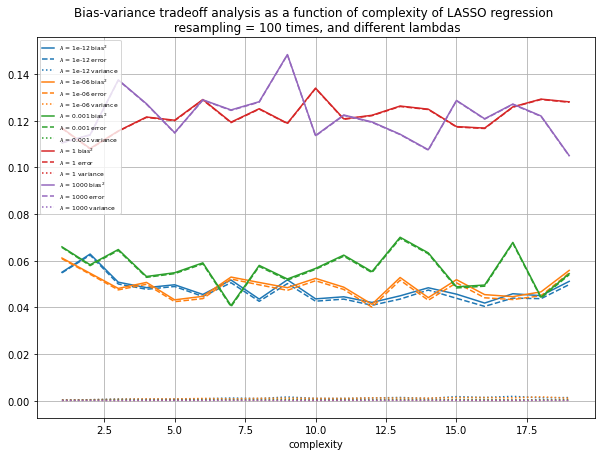

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.60077347619351, tolerance: 0.010119225562552077
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.21593634745852, tolerance: 0.009919573912518392
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.86971331100029, tolerance: 0.00873624708516439
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklear

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.303981314136733, tolerance: 0.009105254327004158
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.86589577227618, tolerance: 0.00815903357661542
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.58633583430698, tolerance: 0.010230723615730774
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.338490158300917, tolerance: 0.009369149953892554
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.56990155160862, tolerance: 0.009642085339468963
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.656146895451674, tolerance: 0.0037125801019948852
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.060262702249176, tolerance: 0.0075613243406605435
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.07356049650264, tolerance: 0.00789255595786352
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.72158527867225, tolerance: 0.0064877259823685526
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.41022680948779, tolerance: 0.008588637404487221
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.526855631948369, tolerance: 0.008054726342257915
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.06515540594217, tolerance: 0.009087354172530758
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.214183432072897, tolerance: 0.010300934231648072
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.345388534939419, tolerance: 0.0063002300319167275
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.237514451733148, tolerance: 0.010281504222216789
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/s

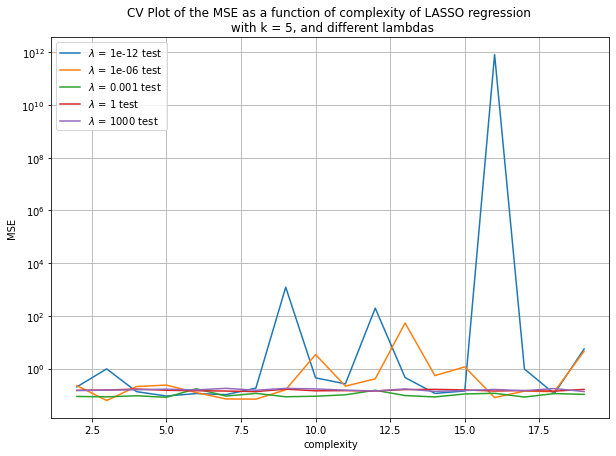

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.92840884229372, tolerance: 0.008488278289636409
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.50276019950016, tolerance: 0.009879191630022103
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.618688666262912, tolerance: 0.010848429339021921
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.30528162087076, tolerance: 0.010511954610933077
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.53719038766728, tolerance: 0.00897940902967674
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.449802046285296, tolerance: 0.008428198355565287
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.84883707057102, tolerance: 0.009992924713169728
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.271102440114333, tolerance: 0.01031876315475908
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.352816607353127, tolerance: 0.01074032260977377
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.293632725995106, tolerance: 0.010298716527132653
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.997457650116097, tolerance: 0.010266106602445561
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.776372503628295, tolerance: 0.010114667148411596
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.485389562166706, tolerance: 0.009374731299603796
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.54755473786066, tolerance: 0.009519413428692561
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.70247123177065, tolerance: 0.010363865237454728
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.59263277902132, tolerance: 0.010405386763150675
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.857787491333927, tolerance: 0.010239483367846032
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.143957807524167, tolerance: 0.010137891772091267
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.79101816949986, tolerance: 0.010815537598766198
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.89313233433732, tolerance: 0.010654053228759883
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.051498874597826, tolerance: 0.010083181464547189
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.890507768865433, tolerance: 0.01064597807219949
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.457596519255194, tolerance: 0.010636524550937224
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.565268383271956, tolerance: 0.010665699574270385
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.47948809252654, tolerance: 0.01031869025310096
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.517071331159023, tolerance: 0.01029318483750963
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.642986717597108, tolerance: 0.009564632924447114
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.06336756970574, tolerance: 0.009965176702504477
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.60929711784701, tolerance: 0.010159522404030584
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.97012956794374, tolerance: 0.010800106749160647
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.983749898379568, tolerance: 0.010119114743556687
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.590774367055742, tolerance: 0.00716149578631194
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.752955603282697, tolerance: 0.010419760034952171
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0193952294720674, tolerance: 0.010176754949342191
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018469763537368067, tolerance: 0.010102818244852034
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010820048299429175, tolerance: 0.00820495665146458
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages

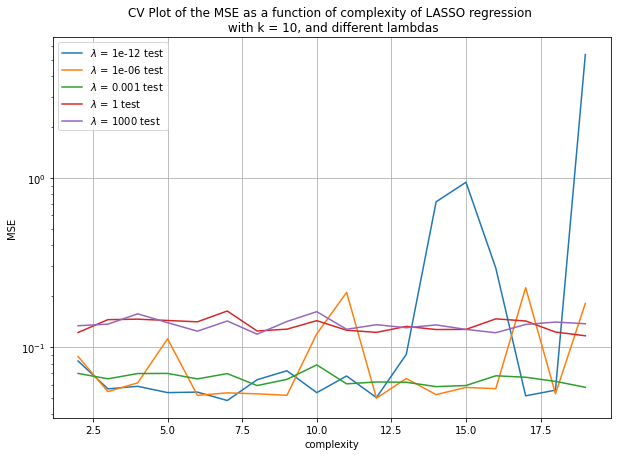

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.666227904467753, tolerance: 0.008765371975143234
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.210648563368384, tolerance: 0.009942525200124596
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.47652709072832, tolerance: 0.008608612070903581
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.876257007775745, tolerance: 0.009215068617346202
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.805329410861642, tolerance: 0.008578935006173205
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.26999096355628, tolerance: 0.009157220137951083
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.847814481133723, tolerance: 0.00881932407028518
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.462711604995643, tolerance: 0.00808997698890035
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.319726463425184, tolerance: 0.008367366707661597
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.93278990371821, tolerance: 0.00873506241771614
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.819875455013321, tolerance: 0.007874820395923852
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.75528035530698, tolerance: 0.008226259190247288
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.696690436857292, tolerance: 0.00869490479520344
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.498138250095312, tolerance: 0.008596266535918546
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.106421621694533, tolerance: 0.009031923119247184
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.696574587796828, tolerance: 0.008104256494009778
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.020085947810596, tolerance: 0.007959008676155633
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.11853695635932, tolerance: 0.008259051023648194
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.795353084234222, tolerance: 0.008154498071250573
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.125928198401537, tolerance: 0.00803827471051998
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.309355450286713, tolerance: 0.008753431217106165
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.455821160218383, tolerance: 0.008559991066274246
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.916241265521537, tolerance: 0.009152535112006905
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.169960746071563, tolerance: 0.008379376909429108
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.966112952069231, tolerance: 0.00878162921195186
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.59504944536614, tolerance: 0.007767751138020397
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.419161299971012, tolerance: 0.008006244625525322
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.568008116795886, tolerance: 0.00799712807797809
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.513846478102405, tolerance: 0.008451156029662375
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.258548018978527, tolerance: 0.009672584729060275
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.24181713965987, tolerance: 0.008974737460123412
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.725559398224556, tolerance: 0.00904993901852247
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.69821938556054, tolerance: 0.008551150794050517
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.260902108160288, tolerance: 0.008847668947787627
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.20973287280973, tolerance: 0.0094218533306731
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.582967266311375, tolerance: 0.008543611186041779
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.250758757488594, tolerance: 0.0088093438929066
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.300762252567605, tolerance: 0.007898638608322024
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.129928630283645, tolerance: 0.009396331831206308
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.838250556639325, tolerance: 0.009129046599721762
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.704889696115302, tolerance: 0.008540428202317181
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.34261166850094, tolerance: 0.009057761369190068
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.760409344985748, tolerance: 0.008822564489196666
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.07639507929295, tolerance: 0.008355226132785042
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.611039078173146, tolerance: 0.00816625942296391
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.819348360132317, tolerance: 0.008080177749679266
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.869692075069844, tolerance: 0.00755988785536107
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.107424169693171, tolerance: 0.008411446675387554
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.230341023500069, tolerance: 0.00839205397085776
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.138096594538068, tolerance: 0.00814091255764833
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.272234473236475, tolerance: 0.008260576671420744
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.657289930312016, tolerance: 0.008056966643330315
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.91650052716815, tolerance: 0.0074575574179593495
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.618006177331823, tolerance: 0.00791491915605097
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.485279460192485, tolerance: 0.008096652189739291
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.557358753764351, tolerance: 0.007668938154628884
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.544447863241261, tolerance: 0.007968801322895165
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.038138854690954, tolerance: 0.008034723283643049
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.084226742812133, tolerance: 0.008202175423045665
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.620382426318708, tolerance: 0.008447625994502585
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.60262345482377, tolerance: 0.008422977011791353
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.987690694346245, tolerance: 0.008384212877654904
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.92642773428159, tolerance: 0.008444803473227064
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.3391704648842, tolerance: 0.007703896495289246
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.769184591625368, tolerance: 0.007834743368016303
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.754976962189705, tolerance: 0.008417685890175074
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.792511573688065, tolerance: 0.008733580241916221
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.90333908958468, tolerance: 0.007542099343908983
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.253304665306562, tolerance: 0.008026710824436196
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.269579888856633, tolerance: 0.00822935997529894
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.394823462192909, tolerance: 0.008640740501720177
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.732790860515568, tolerance: 0.008891675337176407
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.480339563950633, tolerance: 0.008789408630857394
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.95110244930881, tolerance: 0.009011313713491247
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.245844288476214, tolerance: 0.009117179838233132
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.173186192731988, tolerance: 0.008457505001190378
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.997929658784582, tolerance: 0.008538502459477756
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.146640632673767, tolerance: 0.008593929752150922
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.28072968766769, tolerance: 0.008153018621978064
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.744393089120592, tolerance: 0.008946944529803852
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.465812792577204, tolerance: 0.008489562935126498
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.108230677289283, tolerance: 0.008692849683563129
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.87039309309787, tolerance: 0.00938962728573798
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.636237651587118, tolerance: 0.00798812490603064
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.452159255639566, tolerance: 0.008544303255698531
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.486077726263733, tolerance: 0.009092561772876517
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.869145272474494, tolerance: 0.008835624538480401
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.700526273293224, tolerance: 0.009057315449161501
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.50022069544285, tolerance: 0.008512072010182692
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.957267695454364, tolerance: 0.008002105381047238
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.797663772750019, tolerance: 0.008849650886094474
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.991270380958719, tolerance: 0.008758407648114567
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.377089376788371, tolerance: 0.007980628421069813
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.296074625338244, tolerance: 0.00903820822562096
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.138271271263358, tolerance: 0.008779910487673143
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.040112454125998, tolerance: 0.008717303750808494
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.31365229732646, tolerance: 0.008449097119151476
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.135136462448902, tolerance: 0.008741930730244008
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.982616186466442, tolerance: 0.008552144124170638
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.099723491985939, tolerance: 0.008910230255538576
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.34019103195093, tolerance: 0.008765752250712381
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.46740059641287, tolerance: 0.008915886739482057
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.55122807063531, tolerance: 0.008945577140317846
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.249280396864892, tolerance: 0.008738476519563092
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.49181426233498, tolerance: 0.008670101978858194
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.983068353217945, tolerance: 0.008631918087181932
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.602187313795014, tolerance: 0.009914660422206019
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.871626328481018, tolerance: 0.008861479399485445
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.497582263480304, tolerance: 0.008812374066731255
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.26272179081438, tolerance: 0.009204488692430474
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.859247921662078, tolerance: 0.008689073891614506
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.550721661997667, tolerance: 0.008598326146281489
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.46913307348081, tolerance: 0.008629056538476692
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.927644447441764, tolerance: 0.008915530325500385
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.14148232067181, tolerance: 0.008553882051665166
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.70952993201452, tolerance: 0.008629468978470032
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.384655603472073, tolerance: 0.008616122704871545
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.723502409500773, tolerance: 0.008262581197840103
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.453030731265505, tolerance: 0.00930412090579799
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.784552154267136, tolerance: 0.0093299302702053
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.196769544193646, tolerance: 0.009645794107433133
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.705923101289963, tolerance: 0.008398735857298162
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.955676586848513, tolerance: 0.007513821462534853
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.265021041639391, tolerance: 0.008751307349916944
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.136798471677245, tolerance: 0.008744778349100894
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.045665366532283, tolerance: 0.009410754299098564
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.899249982577135, tolerance: 0.008842306265423433
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.251530814275656, tolerance: 0.00847918411015878
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.57474238541806, tolerance: 0.009521221428421066
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.283493538198128, tolerance: 0.008580387266728612
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.951362302220286, tolerance: 0.009116866955564549
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.620005674952466, tolerance: 0.008887115762325117
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.525536116729775, tolerance: 0.008498129833383118
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.399690443476851, tolerance: 0.007793411143149631
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.222658797264966, tolerance: 0.009482248330816722
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.70165724127206, tolerance: 0.010283236894884116
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.61079434918815, tolerance: 0.009791806711754381
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.804982534771836, tolerance: 0.008757216823236224
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

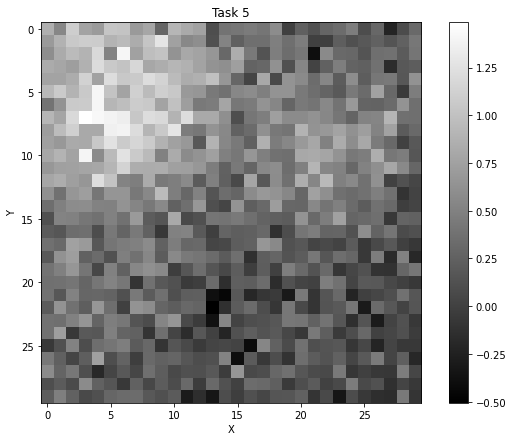

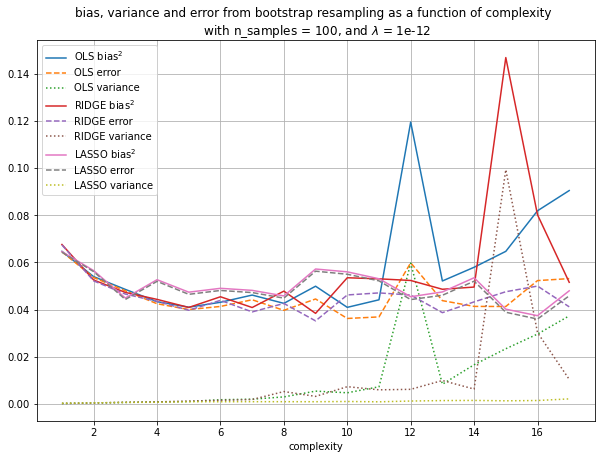

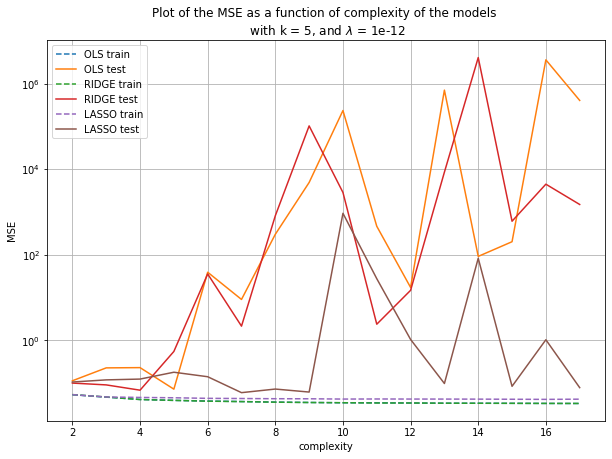

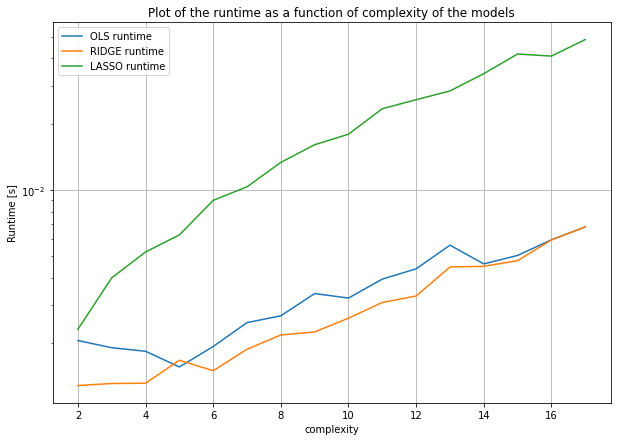

In [1]:
%run ../1project/task5.py

### Comments
<font color=purple>**comment results**

Give  acritical discussion of the three methods and a judgement of which model fits the data best.  Perform here as well an analysis of the bias-variance trade-off using the **bootstrap** resampling technique and an analysis of the mean squared error using cross-validation. 
</font>

## Exercise 6: Analysis of real data
### Introduction

**With our codes functioning and having been tested properly on a
simpler function we are now ready to look at real data. We will
essentially repeat in this exercise what was done in exercises 1-5. However, we
need first to download the data and prepare properly the inputs to our
codes.  We are going to download digital terrain data from the website
<https://earthexplorer.usgs.gov/>,**

**Or, if you prefer, we have placed selected datafiles at <https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects/2021/Project1/DataFiles>

**In order to obtain data for a specific region, you need to register as
a user (free) at this website and then decide upon which area you want
to fetch the digital terrain data from.  In order to be able to read
the data properly, you need to specify that the format should be **SRTM
Arc-Second Global** and download the data as a **GeoTIF** file.  The
files are then stored in *tif* format which can be imported into a
Python program using

### Algorithm
- `FrankeFunction(x,y)`:


### Results
Since it may take some time to run, we upload directly the results.

In [ ]:
"""%run ../1project/task6.py"""

### Comments
<font color=purple>**At the end, you should present a critical evaluation of your results
and discuss the applicability of these regression methods to the type
of data presented here (either the terrain data we propose or other data sets).**</font>

# Fred's version:

In [ ]:
import numpy as np
from random import random, seed
from regression import FrankeFunction, create_X, Split_and_Scale, OLS_solver, MSE, R2, Plot_FrankeFunction

# Create vanilla dataset:
np.random.seed(1233)

n = 25

x = np.linspace(0,1,n)
y = np.linspace(0,1,n) 
x, y = np.meshgrid(x,y)

sigma_N = 0.1; mu_N = 0 
z = FrankeFunction(x,y) +mu_N+sigma_N*np.random.randn(n,n)

Plot_FrankeFunction(x,y,z, title="Original noisy dataset")


Above, we see a plot of the frankefunction with some added noise. Having $\sigma = 0.1$ seems to be a reasonable amount of noise, by looking at the plot. 

We can know create the designmatrix, for a polynomial up to the 5th order. We also want to split and scale the dataset, so we can make our model and prediction.

We do not **have** to scale this dataset as we're not working with a lot of different units. If we imagine this to be terrain data, all the data in the set could be mesured in meteres. However, we use boolean as an argument to quickly be able to enable or disable scaling. We decided to scale the data for more adaptive code that can be reused for other purposes(Adele agree?).

To create the designmatrix, as well as to split and scale out data, we run the following lines:

In [ ]:
degree=5

X = create_X(x, y, degree)
X_train, X_test, z_train, z_test = Split_and_Scale(X,np.ravel(z)) #StardardScaler, test_size=0.2, scale=true

As we now have our training and test data seperated we can go on to find the optimal $\hat{\beta}$ values for the training set, as well as our model and prediction. We do this using **OLS_solver()** which calculates $\hat{\beta}$ through matrix inversion:

$$\hat{\beta}^{OLS} = (X^T X)^{-1}X^T z$$

Where X is the designmatrix for the traindata and z is the training datapoints from the frankefunction. To avoid problems arising from singular matrices, we use the **pinv()** function to find the psudoinverse.

This yields both our model and the prediction by
$$\tilde{z} = X \hat{\beta}$$
Where X is the designmatrix for the training data to produce our model, and the designmatrix for our test data to produce out prediction. 

We run the following line to find our result:

In [ ]:
ols_beta, z_tilde,z_predict = OLS_solver(X_train, X_test, z_train, z_test)

As we now have our model and prediction we can go on to calculate the mean square error and the R2 score for both our model and presdiction:

Finally, we know that the confidence interval of beta can be found by:
$$var(\beta) = \sigma^2 (X^T X)^{-1}$$
Where $\sigma$ si our deviation from the dataset, and X is the designmatrix for the training data.

We can therefore calculate the confidence interval in the following way:


In [ ]:
import pandas as pd
# Confidence interval
beta_ols_variance = sigma_N**2 * np.linalg.pinv(X_train.T @ X_train) #Calculates variance of beta
var_diag=np.diag(beta_ols_variance)
ci1 = ols_beta - 1.96 * np.sqrt(var_diag)/(X.shape[0])
ci2 = ols_beta + 1.96 * np.sqrt(var_diag)/(X.shape[0])
print('Confidence interval of β-estimator at 95 %:')
ci_df = {r'$β_{-}$': ci1,
         r'$β_{ols}$': ols_beta,
         r'$β_{+}$': ci2}
ci_df = pd.DataFrame(ci_df)
display(np.round(ci_df,3))#prec
print("––––––––––––––––––––––––––––––––––––––––––––")


Above we can see the confidence interval for our estimators with a 95% certainty. 

Firstly, the $MSE$ is explored as function of complexity, in particular when dividing the dataset into training and test data, in order to find the optimal "complexity" (i.e. degree of polynomial) without exceding in overfitting. To get a better extimation of the $MSE$ it has been coupled with resampling methods, and to have a better understanding and deeper comprehension, a bias-variance tradeoff analysis has been performed.

We can reproduce figure. 2.11 from Hastie, Tibshiani and Friedman, by plotting the MSE as a function of the complexity of the model. By using the same x, y and z values, we calculate the designmatrix **X** with a complexity from n=2 to n=20, where n is the compexity/degree og the polynomial. For each designmtrix we find the OLS and calcualte the MSE for the test and training data. We import the function **plot_ols_complexity**(x, y, z, complexity) from the linear_regression library, which does exactly this. It's default valye for complexity is set to **range(2,20)**. After importing **plot_ols_complexity()** we can therefore simply write:

In [ ]:
from linear_regression import plot_ols_complexity
complexity = range(2,20)
plot_ols_complexity(x,y,z,complexity)